In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "/home/bflaggs/auger/SKALA/iklogs/LetyT3Requests_2025_08_15_wTriggerInfo.txt"

In [6]:
data = np.loadtxt(filepath, dtype=str, delimiter=", ", skiprows=1)

In [7]:
data[0]

array(['1439251216', '935450', '0', '20', 'XbFast'], dtype='<U10')

In [ ]:
delta_ts = []
delta_ts_cutMulti = []
for i in range(1, len(file)):
    delta_ts.append(float(data[i][0]) - float(data[i-1][0]))

    if delta_ts[-1] == 0.0 and data[i][4] == data[i-1][4]:
        print(f"Lines {i} and {i-1} have the same timestamp and trigger: {data[i][0]}, {data[i][4]}")
    elif delta_ts[-1] == 0.0 and data[i][4] != data[i-1][4]:
        continue
    else:
        delta_ts_cutMulti.append(delta_ts[-1])

Lines 69 and 68 have the same timestamp and trigger: 1439251969, Xb
Lines 88 and 87 have the same timestamp and trigger: 1439252147, Fd
Lines 222 and 221 have the same timestamp and trigger: 1439253545, Xb
Lines 531 and 530 have the same timestamp and trigger: 1439257902, Xb
Lines 543 and 542 have the same timestamp and trigger: 1439258086, Xb
Lines 705 and 704 have the same timestamp and trigger: 1439260143, Xb
Lines 739 and 738 have the same timestamp and trigger: 1439260467, Xb
Lines 825 and 824 have the same timestamp and trigger: 1439261663, Xb
Lines 937 and 936 have the same timestamp and trigger: 1439263138, Fd
Lines 972 and 971 have the same timestamp and trigger: 1439263712, Xb
Lines 991 and 990 have the same timestamp and trigger: 1439263929, Xb
Lines 1005 and 1004 have the same timestamp and trigger: 1439264105, Xb
Lines 1069 and 1068 have the same timestamp and trigger: 1439264832, Xb
Lines 1095 and 1094 have the same timestamp and trigger: 1439265081, Xb
Lines 1176 and 117

In [14]:
# So sometimes it looks like the timestamp (in seconds) and the trigger are the same
# It could be just a very large event that triggers multiple T3 requests...
# If that's true, then it should definitely be a T3 event (but maybe not with Lety involved)
print(data[68], data[69])

['1439251969' '309257' '-123' '30' 'Xb'] ['1439251969' '214170' '-123' '30' 'Xb']


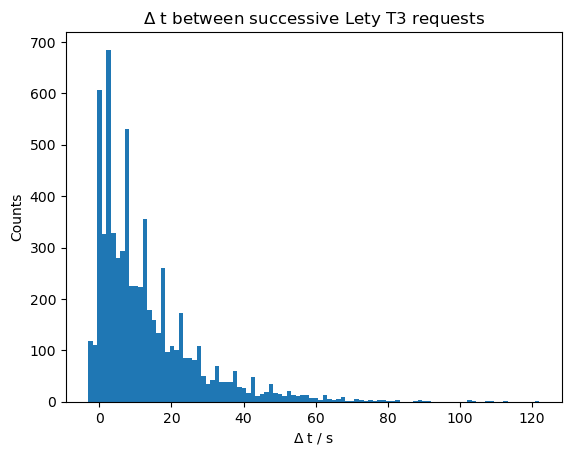

In [15]:
plt.hist(delta_ts, bins=100, label="All Lety T3 requests")
plt.xlabel(r"$\Delta$ t / s")
plt.ylabel("Counts")
plt.title(r"$\Delta$ t between successive Lety T3 requests")
plt.show()

In [16]:
min(delta_ts)

-3.0

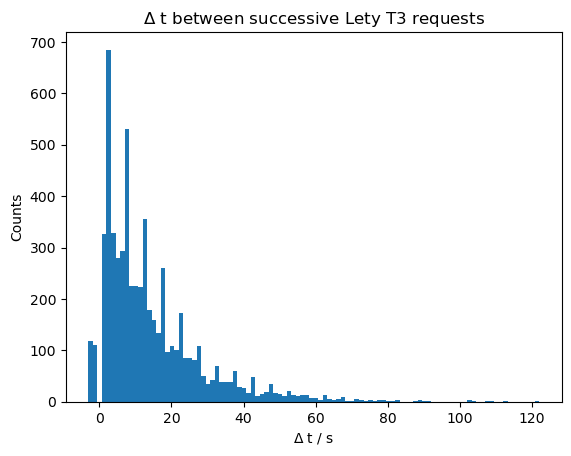

In [17]:
plt.hist(delta_ts_cutMulti, bins=100, label="Lety T3 requests (cut multi-triggers and large events)")
plt.xlabel(r"$\Delta$ t / s")
plt.ylabel("Counts")
plt.title(r"$\Delta$ t between successive Lety T3 requests")
plt.show()

In [18]:
# Don't know why there are negative time differences...